In [8]:
import pandas as pd 
import numpy as np 
data=pd.read_csv('train.csv')

In [9]:
data.replace('?', np.nan, inplace=True)
data=data.astype({'Age': np.float64, 'Fare': np.float64})

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

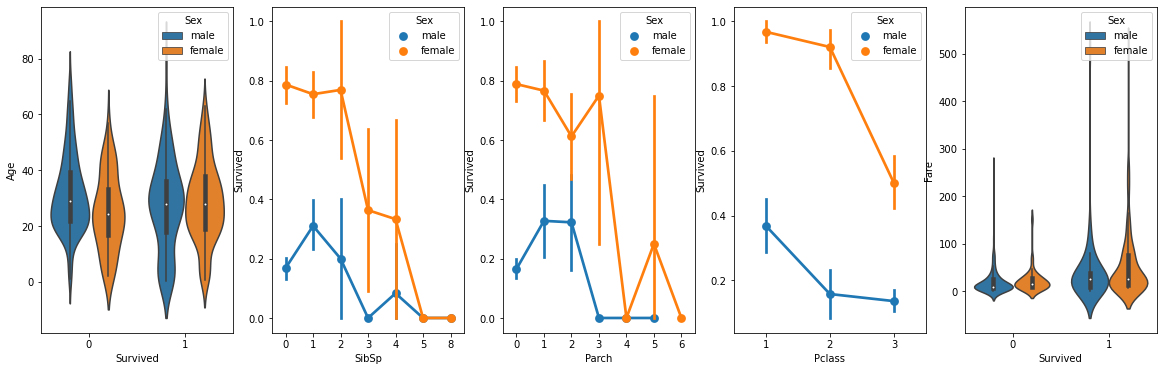

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs=plt.subplots(ncols=5, figsize=(20,6))
sns.violinplot(x="Survived", y='Age', hue='Sex', data=data, ax=axs[0])
sns.pointplot(x='SibSp', y="Survived", hue='Sex', data=data, ax=axs[1])
sns.pointplot(x='Parch', y="Survived", hue='Sex', data=data, ax=axs[2])
sns.pointplot(x='Pclass', y="Survived", hue='Sex', data=data, ax=axs[3])
sns.violinplot(x="Survived", y='Fare', hue='Sex', data=data, ax=axs[4])

In [11]:
data.replace({'male': 1, 'female': 0}, inplace=True)

In [12]:
data.corr().abs()[['Survived']]

,Survived
PassengerId,0.005007
Survived,1.000000
Pclass,0.338481
Sex,0.543351
Age,0.077221
SibSp,0.035322
Parch,0.081629
Fare,0.257307


In [13]:
data['Relatives']=data.apply(lambda row: int((row['SibSp'] + row['Parch'])>0), axis=1)
data.corr().abs()[['Survived']]

,Survived
PassengerId,0.005007
Survived,1.000000
Pclass,0.338481
Sex,0.543351
Age,0.077221
SibSp,0.035322
Parch,0.081629
Fare,0.257307
Relatives,0.203367


In [14]:
data = data[['Sex', 'Pclass', 'Age', 'Relatives', 'Fare', 'Survived']].dropna()

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['Sex', 'Pclass', 'Age', 'Relatives', 'Fare']], data.Survived, test_size=0.2, random_state=0)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [17]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [18]:
from sklearn import metrics
predict_test = model.predict(x_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7482517482517482


In [19]:
import tensorflow as tf

In [20]:
from keras.models import Sequential
from keras.layers import Dense

model=Sequential()

In [21]:
model.add(Dense(5, kernel_initializer='uniform', activation='relu', input_dim=5))
model.add(Dense(5, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
18/18 [==============================] - 0s 2ms/step - loss: 0.3817 - accuracy: 0.8424
Epoch 2/50
18/18 [==============================] - 0s 2ms/step - loss: 0.3811 - accuracy: 0.8389
Epoch 3/50
18/18 [==============================] - 0s 2ms/step - loss: 0.3792 - accuracy: 0.8354
Epoch 4/50
18/18 [==============================] - 0s 2ms/step - loss: 0.3791 - accuracy: 0.8371
Epoch 5/50
18/18 [==============================] - 0s 2ms/step - loss: 0.3796 - accuracy: 0.8389
Epoch 6/50
18/18 [==============================] - 0s 2ms/step - loss: 0.3799 - accuracy: 0.8336
Epoch 7/50
18/18 [==============================] - 0s 2ms/step - loss: 0.3795 - accuracy: 0.8354
Epoch 8/50
18/18 [==============================] - 0s 2ms/step - loss: 0.3789 - accuracy: 0.8336
Epoch 9/50
18/18 [==============================] - 0s 2ms/step - loss: 0.3789 - accuracy: 0.8354
Epoch 10/50
18/18 [==============================] - 0s 2ms/step - loss: 0.3794 - accuracy: 0.8406
Epoch 11/50
18/18 [

In [28]:
y_pred =  model.predict_classes(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7902097902097902
